<a href="https://colab.research.google.com/github/JiaminJIAN/20MA573/blob/master/src/MC_and_TD_for_nd_BVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Monte Carlo and Temporal difference for n-D BVP**

For the multidimensional BVP,

- Domain:

$$O = \{x \in \mathbb{R}^{d}: 0 < x_{i} < 1, i = 1, 2, \dots, d\}.$$

- Equation on O:

$$(\frac{1}{2} \Delta - \lambda) v(x) + \sum_{i=1}^{d} b_{i}(x) \frac{\partial v(x)}{\partial x_{i}} + l(x) = 0.$$

- Dirichlet data on O:

$$v(x) = g(x).$$

We use the value iteration to get the numerical solution of the above PDE.

The finite differencee operator is as following:

- CFD

$$\frac{\partial v(x)}{\partial x_{i}} \approx \bar{\delta}_{h e_{i}} v(x) = \frac{v(x + h e_{i})- v(x - h e_{i})}{2h}.$$

- SCFD

$$\frac{\partial^{2} v(x)}{\partial x_{i}^{2}} \approx \delta_{he_{i}}\delta_{-he_{i}} v(x) = \frac{v(x+he_{i}) - 2v(x) + v(x - he_{i})}{h^{2}}.$$

We denote $v_{i}^{+} = v(x + he_{i})$, $v = v(x)$ and $v_{i}^{-} = v(x - he_{i})$, then we have

$$\frac{1}{2} \sum_{i = 1}^{d} \frac{v_{i}^{+} - 2v + v_{i}^{-}}{h^{2}} - \lambda v + \sum_{i = 1}^{d} b_{i} \frac{v_{i}^{+} - v_{i}^{-}}{2h} + l = 0.$$

By sorting out the same items, we have

$$v (x) = \frac{d}{d + \lambda h^{2}} \{\frac{h^{2}}{d} l(x) + \sum_{i = 1}^{d} \frac{1}{2d} (1 + h b_{i}(x)) v_{i}^{+} + \sum_{i = 1}^{d} \frac{1}{2d} (1 - h b_{i}(x)) v_{i}^{-} \}.$$

We denote $\gamma = \frac{d}{d + \lambda h^{2}}$, $l^{h} (x) = \frac{h^{2}}{d} l(x)$ and $p^{h}(x \pm he_{i} |x) = \frac{1}{2d} (1 \pm h b_{i}(x))$, then we can get that

$$v (x) = \gamma \{l^{h}(x) + \sum_{i=1}^{d} (p^{h}(x+he_{i}|x)v(x+he_{i}) + p^{h}(x - he_{i}|x) v(x-he_{i}))\}.$$


## **Exercise:**

Consider 2-d PDE

$$\frac{1}{2} \Delta v(x) - v(x) + x_{1}^{2} + x_{2}^{2} -x_{1} - x_{2} - \frac{3}{2} = 0, \, x \in O = (0, 1)^{2}$$

with the boundary data

$$v(x) = (x_{1} - \frac{1}{2})^{2} + (x_{2} - \frac{1}{2})^{2}, \, x \notin O.$$

- Identify MRP with CFD in the form of

$$v (x) = \gamma \{l^{h}(x) + \sum_{i=1}^{d} (p^{h}(x+he_{i}|x)v(x+he_{i}) + p^{h}(x - he_{i}|x) v(x-he_{i}))\}.$$

- For $h = \frac{1}{8}$, compute CFD solution by value iteration.
- For $h = \frac{1}{8}$, compute CFD solution by Monte-Carlo method.
- For $h = \frac{1}{8}$, compute CFD solution by TD method.
- Compare above three methods and conclude your observations.

## **Solution:**

(1) Identify MRP with CFD in the form of

$$v (x) = \gamma \{l^{h}(x) + \sum_{i=1}^{d} (p^{h}(x+he_{i}|x)v(x+he_{i}) + p^{h}(x - he_{i}|x) v(x-he_{i}))\}.$$


**Solution:**

Using the CFD method, we have

$$\frac{1}{2} \sum_{i = 1}^{2} \frac{v_{i}^{+} - 2v + v_{i}^{-}}{h^{2}} - v + (x_{1} - \frac{1}{2})^{2} + (x_{2} - \frac{1}{2})^{2} -2 = 0.$$

By sorting out the same terms, we have

$$v(x) = \frac{2}{2+ h^{2}} \{ \frac{h^{2}}{2} [(x_{1} - \frac{1}{2})^{2} + (x_{2} - \frac{1}{2})^{2} -2] + \sum_{i=1}^{2} \frac{1}{4} v(x + he_{i}) + \sum_{i=1}^{2} \frac{1}{4} v(x - he_{i})\}.$$

Thus we can get that

$$\gamma = \frac{2}{2+h^{2}}, \quad l^{h}(x) = \frac{h^{2}}{2} [(x_{1} - \frac{1}{2})^{2} + (x_{2} - \frac{1}{2})^{2} -2], \quad p^{h}(x\pm he_{i}|x) = \frac{1}{4}.$$

Then we know that the transition probability is 

$$p(s, s^{'})=
\begin{cases}
\frac{1}{4}, & \|s - s^{'}\| = 1 \\
0,& otherwise.
\end{cases}$$

And the reward function is

$$R(s) = \gamma l^{h}(x) = \frac{h^{2}}{2+h^{2}} [(x_{1} - \frac{1}{2})^{2} + (x_{2} - \frac{1}{2})^{2} -2].$$

what's more, the discount factor is

$$\gamma = \frac{2}{2+h^{2}}$$

(2) For $h = \frac{1}{8}$, compute CFD solution by value iteration, Monte-Carlo method and TD method. Then compare above three methods and conclude your observations.

**Solution:**

In [0]:
import time
import math
import random
import numpy as np
import matplotlib.pyplot as plt   
import itertools
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [0]:
## PDE class, define the drift, run cost l^{h}(x), terminal cost and the exact solution of PDE

class Pde:
    def __init__(self, n_dim = 2, verbatim = False):
        self.n_dim = n_dim    
        self.lam = 1
        self.domain = [0,1]
        
        if verbatim == True:
            print('>>> n_dim: '+str(n_dim))
            print('>>> domain: ' + str(self.domain))
            
    drift = lambda self,s,a: [a1*0 for a1 in a]
    
    run_cost = lambda self,s,a: sum([(s1-0.5)**2 - self.n_dim for s1 in s])

    term_cost = lambda self,s: sum([(s1-0.5)**2 for s1 in s]) 
    exact_soln = lambda self,s: sum([(s1-0.5)**2 for s1 in s]) 


In [0]:
## Transform the PDE into MDP by the CFD scheme or UFD scheme

class Mdp(Pde):
    def __init__(self, n_dim = 2, n_mesh = 8, verbatim = False):
        super().__init__(n_dim, verbatim)
        self.n_mesh= n_mesh  
        self.totn_mesh = self.n_mesh*(self.domain[1]-self.domain[0])
        self.h_mesh = 1./self.n_mesh #mesh size
        self.v_shape = tuple([self.totn_mesh+ 1,]*self.n_dim)
        if verbatim == True:
            print('>>> n_mesh: '+str(n_mesh)
                  +' totn_mesh: '+ str(self.totn_mesh))

    #input: list of index
    #return: physicial coordinate
    def i2s(self,ix): 
        return [x * self.h_mesh+self.domain[0] for x in ix]
    
    def is_interior(self,ix):
        return all(map(lambda a: 0<a<self.totn_mesh, ix))
        
    #input: lists of index and action
    #return: discount rate, running cost, list of next index, list of probability
    def step(self, ix, a, fd='cfd'):
        ix = list(ix)
        s = self.i2s(ix)
        b = Pde.drift(Pde, s, a)
        if fd=='cfd':
            lam = self.n_dim/(self.n_dim+self.lam*(self.h_mesh**2))
            run_cost_h = self.h_mesh**2*self.run_cost(s,a)/self.n_dim
            
            ix_next = []; pr_next= []
            #cfd
            if self.is_interior(ix):
                for i in range(self.n_dim):
                    ix1 = ix.copy(); ix1[i]+=1; ix_next += [ix1,]
                    pr1 = (1+self.h_mesh*b[i])/(self.n_dim*2.0)  #change from (1+2.*self.h_mesh*b[i])/(self.n_dim*2.0) 
                    pr_next += [pr1,]
                for i in range(self.n_dim):
                    ix1 = ix.copy(); ix1[i]-=1; ix_next += [ix1,]
                    pr1 = (1-self.h_mesh*b[i])/(self.n_dim*2.0) #change from (1+2.*self.h_mesh*b[i])/(self.n_dim*2.0) 
                    pr_next += [pr1,]
        elif fd=='ufd':
            c = self.n_dim+sum([abs(b1) for b1 in b])*self.h_mesh
            b_plus = [(abs(b1)+b1)/2. for b1 in b]
            b_minus = [(abs(b1)-b1)/2. for b1 in b]
            lam = c/(c+self.h_mesh**2*self.lam)
            run_cost_h = self.h_mesh**2*self.run_cost(s,a)/c
            ix_next = []; pr_next= []
            #ufd
            if self.is_interior(ix):
                for i in range(self.n_dim):
                    ix1 = ix.copy(); ix1[i]+=1; ix_next += [ix1,]
                    pr1 = (1+2.*self.h_mesh*b_plus[i])/(c*2.0) 
                    pr_next += [pr1,]
                for i in range(self.n_dim):
                    ix1 = ix.copy(); ix1[i]-=1; ix_next += [ix1,]
                    pr1 = (1-2.*self.h_mesh*b_minus[i])/(c*2.0) 
                    pr_next += [pr1,]        
        return lam, run_cost_h, ix_next, pr_next
    
    def step_random(self, ix, a, fd='cfd'):
        lam, run_cost, ix_next, pr_next = self.step(ix, a, fd)
        ix_next_rand = random.choices(ix_next, pr_next, k = 1)
        return lam, run_cost, ix_next_rand[0]    
    

In [0]:
## supplemental tools

def deep_iter(*shape):
    iters = (range(i) for i in shape)
    return itertools.product(*iters)


## product of a list
def product(l):
    out = 1
    for x in l:
        out *= x
    return out



In [0]:
## The methods to solve the MDP

class Solver(Mdp):
    def __init__(self, n_dim = 1, n_mesh = 8, fd = 'ufd', verbatim = False):
        super().__init__(n_dim, n_mesh, verbatim)
        self.fd = fd
        #value iteration init
        self.v = np.zeros(self.v_shape) #init
        self.as_ratio= 3
        self.a_space = tuple([self.as_ratio*self.totn_mesh+1,]*n_dim)
        self.p_shape = tuple(list(self.v_shape)+[self.n_dim,])
        self.policy = np.zeros(self.p_shape) #init
        self.tol = 1e-5; self.max_iter = 1000
        self.sim = 100
        
        #boundary value
        for ix in deep_iter(*self.v_shape):
            if not self.is_interior(ix):
                self.v[ix] = self.term_cost(self.i2s(ix))
    
    
    def i2a(self, ix):
        ix = list(ix)
        return [ix1*self.h_mesh+self.as_ratio*self.domain[0] for ix1 in ix]
    
    #input:
        #list of index and action
    #return:
        #q_val assuming v is value
    def q_val(self, ix, a):
        lam, run_cost_h, ix_next, pr_next = self.step(ix,a,self.fd)
        out = run_cost_h
        for ix1, pr1 in zip(ix_next, pr_next):
            out+=pr1*self.v[tuple(ix1)]
        out *= lam
        return out

    #input:
        #list of index
    #return:
        #list of optimal action
        #corresponding q-value assuming v is value
    def greedy(self, ix):
        a_ix = [0,]*self.n_dim; out_v = self.q_val(ix, self.i2a(a_ix))
        for a_ix1 in deep_iter(*self.a_space):
            out_v1 = self.q_val(ix, self.i2a(a_ix1))
            if out_v1 < out_v:
                a_ix = a_ix1; out_v = out_v1
        return self.i2a(a_ix), out_v
                
    ## value iteration method  
    def value_iter(self):    
        for n_iter in range(self.max_iter):
            v_cp = np.copy(self.v)
            err = 0.
            for ix in deep_iter(*self.v_shape):
                if self.is_interior(ix):
                    out_a, out_v = self.greedy(ix)
                    self.policy[ix] = out_a; self.v[ix] = out_v
                    err += (v_cp[ix]-out_v)**2

            if err<self.tol:
                break
        return err, n_iter

    ## Monte-Carlo method
    def monte_carlo(self):
        for ix in deep_iter(*self.v_shape):
            if self.is_interior(ix):
                output = []
                for i in range(1000):
                    output.append(self.greedy(ix)[1])
                self.v[ix] = np.mean(output)

    ## Plot the 1-d figure
    def plot1d(self):
        if self.n_dim==1:
            x_cod = np.zeros(self.v_shape)
            exact_val = np.zeros(self.v_shape)
            for ix in deep_iter(*self.v_shape):
                x_cod[ix] = self.i2s(list(ix))[0]
                exact_val[ix] = self.exact_soln(self.i2s(list(ix)))
                                
            plt.plot(x_cod, self.v, '--', label='aproximation')
            plt.plot(x_cod, exact_val, label='exact solution')
            plt.legend()
            plt.show()
    
    ## Plot the 2-d figure
    def plot2d(self):
        if self.n_dim==2:
            fig = plt.figure()
            ax = fig.gca(projection=Axes3D.name)
            x_cod = np.zeros(self.v_shape)
            y_cod = np.zeros(self.v_shape)
            z = self.v
            for ix in deep_iter(*self.v_shape):
                x_cod[ix] = agt1.i2s(list(ix))[0]
                y_cod[ix] = agt1.i2s(list(ix))[1]
            # Plot the surface.
            ax.plot_surface(x_cod, y_cod, z, 
                                      cmap='rainbow',
                                      linewidth=0, antialiased=False)
            plt.show()
                            


>>>>>>>check value iteration<<<<<<<<<
>>> n_dim: 1
>>> domain: [0, 1]
>>> n_mesh: 8 totn_mesh: 8
>>>elapsed time: 0.019292831420898438
>>>running err:8.436658739836725e-06
>>>number of iterations: 11


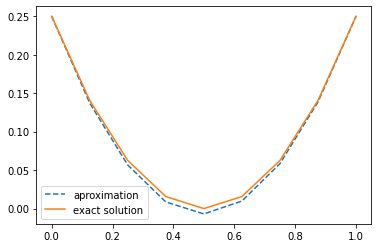

>>>>end check<<<<


In [6]:
## check the value iteration method in 1-d

print('>>>>>>>check value iteration<<<<<<<<<')

startime = time.time()
agt1 = Solver(n_dim=1, n_mesh= 8, fd='cfd', verbatim = True)
err, n_iter = agt1.value_iter()
endtime = time.time()


print('>>>elapsed time: ' + str(endtime-startime))
print('>>>running err:' +str(err))
print('>>>number of iterations: ' + str(n_iter))

agt1.plot1d()    
print('>>>>end check<<<<')

In [7]:
 ## Get the L2 exact error of 1-d

err = 0.
exact_val = np.zeros(agt1.v_shape)
        
for ix in deep_iter(*agt1.v_shape):
    exact_val[ix] = agt1.exact_soln(agt1.i2s(list(ix)))
    err += (exact_val[ix]- agt1.v[ix])**2
    err = err/product(agt1.v_shape)

error = np.sqrt(err)
print('>>>>L2 exact err:'+str(error))

>>>>L2 exact err:0.0002804082989237168


>>>>>>>check value iteration<<<<<<<<<
>>> n_dim: 2
>>> domain: [0, 1]
>>> n_mesh: 8 totn_mesh: 8
>>>elapsed time: 6.679088115692139
>>>running err:9.617557535452535e-06
>>>number of iterations: 20


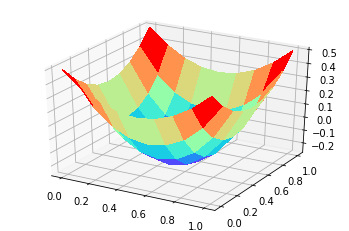

>>>>end check<<<<


In [8]:
## check the value iteration method in 2-d

print('>>>>>>>check value iteration<<<<<<<<<')

startime = time.time()
agt2 = Solver(n_dim=2, n_mesh= 8, fd='cfd', verbatim = True)
err2, n_iter2 = agt2.value_iter()
endtime = time.time()


print('>>>elapsed time: ' + str(endtime-startime))
print('>>>running err:' +str(err2))
print('>>>number of iterations: ' + str(n_iter2))

agt2.plot2d()
print('>>>>end check<<<<')

In [9]:
## Get the L2 exact error 

err2 = 0.
exact_val2 = np.zeros(agt2.v_shape)
        
for ix in deep_iter(*agt2.v_shape):
    exact_val2[ix] = agt2.exact_soln(agt2.i2s(list(ix)))
    err2 += (exact_val2[ix]- agt2.v[ix])**2
    err2 = err/product(agt2.v_shape)

error2 = np.sqrt(err2)

print('>>>>L2 exact err:'+str(error2))

>>>>L2 exact err:3.1156477658190756e-05


>>>>>>>check monte-carlo<<<<<<<<<
>>> n_dim: 1
>>> domain: [0, 1]
>>> n_mesh: 8 totn_mesh: 8
>>>elapsed time: 1.4375331401824951


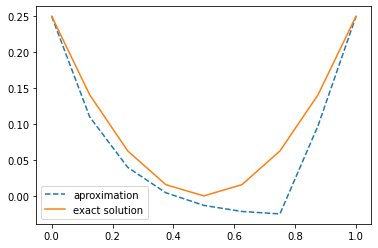

>>>>end check<<<<


In [10]:
## check the Monte-carlo method in 1-d

print('>>>>>>>check monte-carlo<<<<<<<<<')

startime = time.time()
agt3 = Solver(n_dim=1, n_mesh= 8, fd='cfd', verbatim = True)
agt3.monte_carlo()
endtime = time.time()

print('>>>elapsed time: ' + str(endtime-startime))

agt3.plot1d()    
print('>>>>end check<<<<')

In [11]:
err3 = 0.
exact_val3 = np.zeros(agt3.v_shape)
        
for ix in deep_iter(*agt3.v_shape):
    exact_val3[ix] = agt3.exact_soln(agt3.i2s(list(ix)))
    err3 += (exact_val3[ix]- agt3.v[ix])**2
    err3 = err/product(agt3.v_shape)

error3 = np.sqrt(err3)
print('>>>>L2 exact err:'+str(error3))

>>>>L2 exact err:9.346943297457226e-05
